# Exploring Why Civil Resistance Works

In this assignment, you will replicate some of the findings of a well-received book, [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erical Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan. The two authors examined whether nonviolent campaigns are more effective than violent campaigns. They found that yes; from a data set containing details of campaigns from 1900 onwards, they found that in general peaceful campaigns are more effective in achieving their aims than violent ones.

Following the initial publication of the book in 2011, Erica Chenoweth continued her research on the topic and published a follow-up ten years later, [Civil Resistance: What Everyone Needs to Know](https://www.ericachenoweth.com/research/civil-resistance-what-everyone-needs-to-know). She has also continued to update the data used for her research.

The research became famous for propising the 3.5% rule: "the claim that no government has withstood a challenge of 3.5% of their population mobilized against it during a peak event"; you can find a nice overview at [Questions, Answers, and Some Cautionary
Updates Regarding the 3.5% Rule](https://carrcenter.hks.harvard.edu/files/cchr/files/CCDP_005.pdf). Among other things, you will investigate that rule.

To answer the questions, you will use that data, the [Nonviolent and Violent Campaigns and Outcomes (NAVCO) Dataset](https://dataverse.harvard.edu/dataverse/navco), and in particular the [NAVCO 1.2 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0UZOTX). You will also use data from the [Polity Project](https://www.systemicpeace.org/polityproject.html), in particular the Polity5 version, available from [Integrated Network for Societal Conflict Research (INSCR) ](https://www.systemicpeace.org/inscrdata.html), in particular the [Polity5 Annual Time-Series, 1946-2018](http://www.systemicpeace.org/inscr/p5v2018.xls).

---

> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr

## 1. Exploration of Historical Trends

Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.

Your plot should look like the following:

<img src="fig_1.svg"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.read_csv(navco_raw, sep='\t').columns.values
array(['NAVCOID', 'CAMPAIGN', 'LOCATION', 'BYEAR', 'EYEAR', 'TARGET',
       'SUCCESS', 'LIMITED', 'FAILURE', 'ONGOING', 'NONVIOL', 'VIOL',
       'REGCHANGE', 'FSELFDET', 'SECESSION', 'OTHER', 'DURATION',
       'PARTICIPATION', 'PERCENTAGEPOPULARPARTICIPATION', 'REGVIOL',
       'DEFECT', 'VIOLENTFLANK', 'VIOLSIM', 'REGAID', 'STATESUP'],
      dtype=object)

polity_data.columns.values
array(['p5', 'cyear', 'ccode', 'scode', 'country', 'year', 'flag',
       'fragment', 'democ', 'autoc', 'polity', 'polity2', 'durable',
       'xrreg', 'xrcomp', 'xropen', 'xconst', 'parreg', 'parcomp',
       'exrec', 'exconst', 'polcomp', 'prior', 'emonth', 'eday', 'eyear',
       'eprec', 'interim', 'bmonth', 'bday', 'byear', 'bprec', 'post',
       'change', 'd5', 'sf', 'regtrans'], dtype=object)

In [2]:
# Define the database names
xls_file_path = 'p5v2018.xls'
navco_raw = 'NAVCO 1.2 Updated.tab'

# Columns needed from the navco dataset
needed_columns_navco = [
    'CAMPAIGN',
    'LOCATION',
    'EYEAR',
    'TARGET',
    'SUCCESS',
    'LIMITED',
    'NONVIOL',
    'VIOL',
    'PARTICIPATION',
    'PERCENTAGEPOPULARPARTICIPATION'
]

# Columns needed from the polity dataset
needed_columns_polity = [
    'country',
    'year',
    'polity2',
    'eyear'
]

# Reading the Excel file
polity_data = pd.read_excel(xls_file_path,usecols=needed_columns_polity)

# Reading the tab-separated file
navco_data = pd.read_csv(navco_raw, sep='\t',usecols=needed_columns_navco)

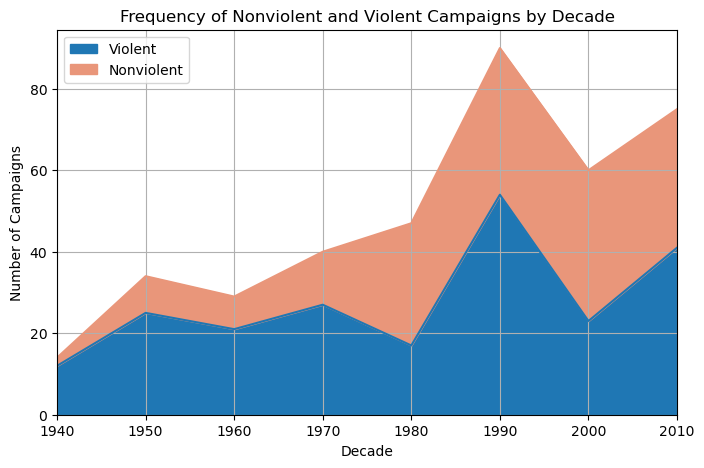

In [3]:
# Clean the data and filter for inf
navco_data.replace([np.inf, -np.inf], np.nan, inplace=True)
navco_data.dropna(subset=['EYEAR'], inplace=True)  # Clean the data
navco_data['EYEAR'] = navco_data['EYEAR'].astype(int)  # Convert 'EYEAR' to integer
navco_data['decade'] = (navco_data['EYEAR'] // 10) * 10  # Create 'decade' column

# Group by 'decade' and 'NONVIOL', then count the occurrences
campaign_counts_by_decade = navco_data.groupby(['decade', 'NONVIOL']).size().unstack(fill_value=0)

# Plot a stacked area chart
campaign_counts_by_decade.columns = ['Violent', 'Nonviolent']  # Rename columns to match the plot colors and labels
campaign_counts_by_decade.plot(kind='area', stacked=True, color=['tab:blue', 'darksalmon'],figsize=(8,5))

# Labeling the plot
plt.title('Frequency of Nonviolent and Violent Campaigns by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Campaigns')
plt.legend(loc='upper left')
plt.xlim(1940,2010)
plt.grid(True)

# Show the plot
plt.show()

Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. Your plot will have two vertical axes, one for each of the metrics, and it should look like this:

<img src="fig_2.svg"/>

In [4]:
# Filter for nonviolent campaigns
nonviolent_campaigns = navco_data[navco_data['NONVIOL'] == 1]
# Count the total number of nonviolent campaigns per decade
campaign_counts_by_decade = nonviolent_campaigns.groupby('decade').size().reset_index(name='count')
# Calculate the success percentage per decade
success_rate_by_decade = nonviolent_campaigns.groupby('decade')['SUCCESS'].mean().reset_index(name='success_rate')
# Merge the two datasets on the 'decade' column
merged_data = pd.merge(campaign_counts_by_decade, success_rate_by_decade, on='decade')

# Prepare data for plotting
decades = merged_data['decade']
counts = merged_data['count']
success_rates = merged_data['success_rate'] * 100  # Convert proportion to percentage

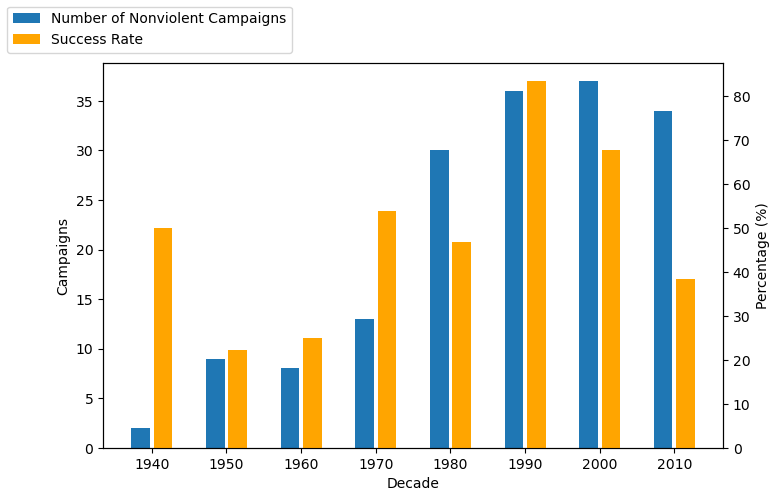

In [5]:
bwidth = 2.5  # Width of the bars
cnt = 1.5  # Distance from the center of the decade tick

fig, ax1 = plt.subplots(figsize=(8,5))

# Bar plot for the number of nonviolent campaigns per decade
bars1 = ax1.bar(decades - cnt, counts, width=bwidth, label='Number of Nonviolent Campaigns')

# Create a secondary y-axis for the success rate
ax2 = ax1.twinx()

# Bar plot for the success rate on the secondary y-axis
bars2 = ax2.bar(decades + cnt, success_rates, width=bwidth, color='orange', label='Success Rate')

# Titles, axes...
ax1.set_xlabel('Decade')
ax1.set_ylabel('Campaigns')
ax2.set_ylabel('Percentage (%)')

# Combine the legends from both axes
handles, labels = [], []
for ax in [ax1, ax2]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
fig.legend(handles, labels, loc=2)

plt.show()

Create a plot showing the success rate for violent and nonviolent campaigns by decade. Your plot should look like the following, showing that nonviolent campaigns have higher success probabilities:

<img src="fig_3.svg" />

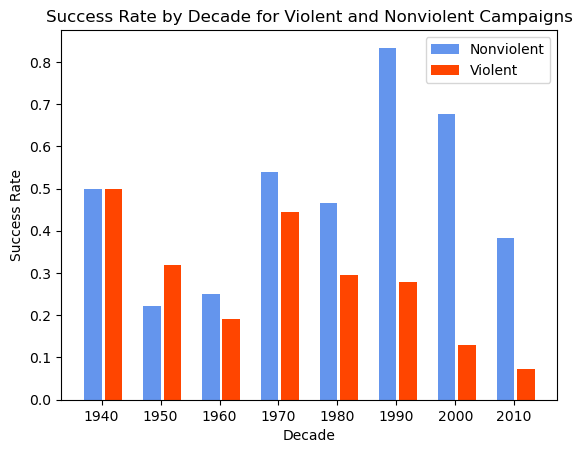

In [6]:
nonviolent_success_rate = navco_data[navco_data['NONVIOL'] == 1].groupby('decade')['SUCCESS'].mean()
violent_success_rate = navco_data[navco_data['VIOL'] == 1].groupby('decade')['SUCCESS'].mean()

# Initialize the matplotlib figure
fig, ax = plt.subplots()

# Width of a bar
bar_width = 0.3
offset = 0.05

# Positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(nonviolent_success_rate))]

# Positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

# Create a bar plot for nonviolent campaigns
ax.bar(bar_l, nonviolent_success_rate, width=bar_width, label='Nonviolent', color='cornflowerblue')

# Create a bar plot for violent campaigns, offset by bar_width to the right
ax.bar([p + bar_width+offset for p in bar_l], violent_success_rate, width=bar_width, label='Violent', color='orangered')

# Set the x-axis ticks with names
plt.xticks(tick_pos, nonviolent_success_rate.index)

# Set the plot title and labels
plt.title('Success Rate by Decade for Violent and Nonviolent Campaigns')
plt.xlabel('Decade')
plt.ylabel('Success Rate')

# Add the legend and show the plot
plt.legend()
plt.show()

## 2. Largest Resistance Campaigns, 1946-2014

Create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%. The plot should look like the one below.

Investigate, outside the largest resistance campaigns, if you can find anything about Greece.

<img src='participation_2pct.svg'>

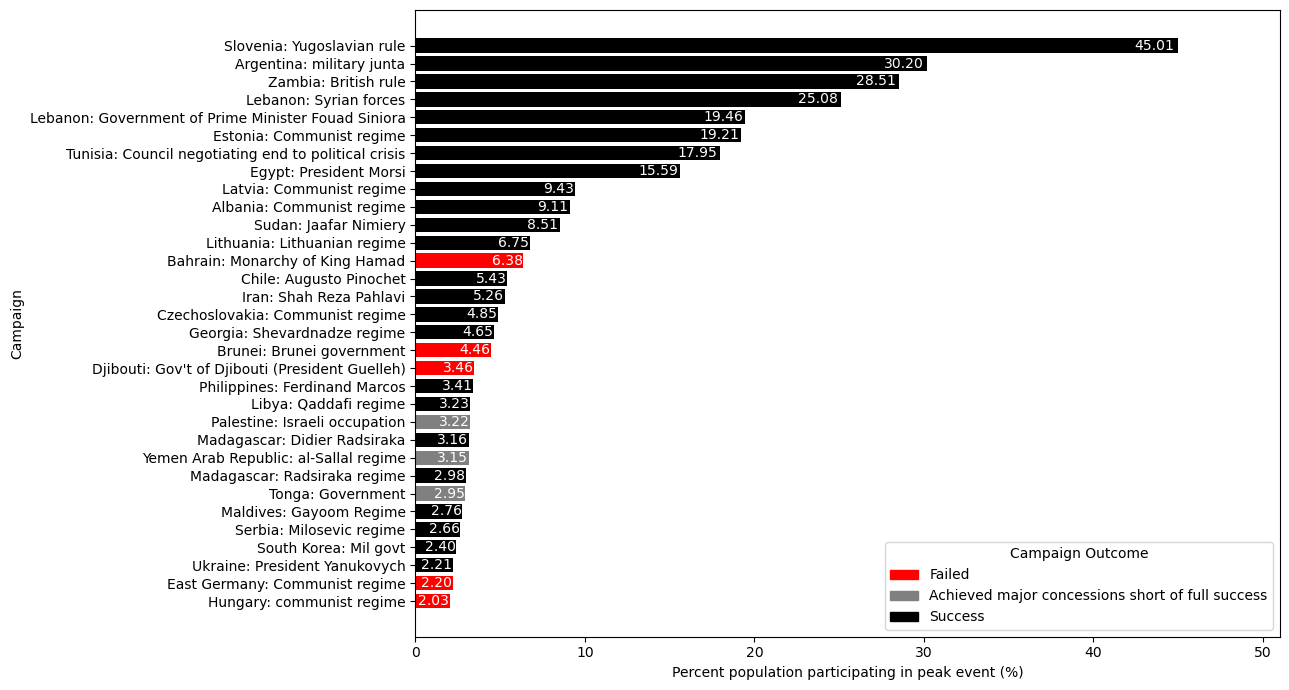

In [7]:
from matplotlib.patches import Patch

# Drop rows with NaN values in specific columns
navco_data.dropna(subset=['EYEAR', 'PERCENTAGEPOPULARPARTICIPATION', 'SUCCESS', 'LIMITED'], inplace=True)

# Check and replace infsd/-inf values with NaN, then drop them
navco_data.replace([np.inf, -np.inf], np.nan, inplace=True)
navco_data.dropna(inplace=True)

# Filter for campaigns from 1946 to 2014 with at least 2.0% participation
filtered_campaigns = navco_data[(navco_data['EYEAR'] >= 1946) & 
                                (navco_data['EYEAR'] <= 2014) &
                                (navco_data['PERCENTAGEPOPULARPARTICIPATION'])]

# Sort the campaigns by percentage of popular participation
sorted_campaigns = filtered_campaigns.sort_values(by='PERCENTAGEPOPULARPARTICIPATION', ascending=False)
sorted_campaigns['label'] = sorted_campaigns['LOCATION'] + ': ' + sorted_campaigns['TARGET']

# Define a function to determine the outcome of the campaign
def determine_outcome(row):
    if row['SUCCESS'] == 1:
        return 'Success'
    elif row['LIMITED'] == 1:
        return 'Achieved major concessions short of full success'
    else:
        return 'Failed'

# Apply the function to determine the outcome
sorted_campaigns['Outcome'] = sorted_campaigns.apply(determine_outcome, axis=1)

# Define colors for each outcome
colors = {
    'Failed': 'red',
    'Achieved major concessions short of full success': 'grey',
    'Success': 'black'
}

# Map the outcome to the corresponding color
sorted_campaigns['Outcome Color'] = sorted_campaigns['Outcome'].map(colors)

# Include only the above 2%
sorted_campaigns_plot = sorted_campaigns[sorted_campaigns['PERCENTAGEPOPULARPARTICIPATION']>= 0.02]

# Plotting
plt.figure(figsize=(13, 7))
bars = plt.barh(sorted_campaigns_plot['label'], 
                sorted_campaigns_plot['PERCENTAGEPOPULARPARTICIPATION']*100,  # Adjust for percentage
                color=sorted_campaigns_plot['Outcome Color'])

plt.xlabel('Percent population participating in peak event (%)')
plt.ylabel('Campaign')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest bar on top

# Now let's try to fit the labels inside each bar
for bar in bars:
    # Get the width of the bar
    bar_width = bar.get_width()

    # Calculate the length of the text to be displayed
    text = f"{bar_width:.2f}"
    text_length = len(text)

    # Calculate an offset based on the width of the bar and the length of the text
    offset = 0.03 * bar_width / text_length

    # Ensure the offset is not too large to avoid placing the text outside the bar
    offset = min(offset, bar_width * 0.1)

    # Place the text inside the bar, towards the right end
    plt.text(
        bar_width - offset,  # Adjust the position based on the calculated offset
        bar.get_y() + bar.get_height() / 2, 
        text,
        va='center', 
        ha='right',
        color='white'
    )

# Create a legend for the colors
legend_handles = [Patch(color=colors[outcome], label=outcome) for outcome in colors]
plt.legend(handles=legend_handles, title="Campaign Outcome")

plt.xlim(0,51)
plt.tight_layout()
plt.show()

In [8]:
#Check for Greece
greece_campaigns = sorted_campaigns[sorted_campaigns['label'].str.contains('Greece')]
# Display the results
print(greece_campaigns)

                CAMPAIGN LOCATION  EYEAR                     TARGET  SUCCESS  \
119      Greek Civil War   Greece   1949  British and US occupation      0.0   
120  Greek anti-military   Greece   1974              Military rule      1.0   

     LIMITED  NONVIOL  VIOL  PARTICIPATION  PERCENTAGEPOPULARPARTICIPATION  \
119      0.0      0.0   1.0        40000.0                        0.005092   
120      0.0      1.0   0.0         2500.0                        0.000279   

     decade                              label  Outcome Outcome Color  
119    1940  Greece: British and US occupation   Failed           red  
120    1970              Greece: Military rule  Success         black  


#### Based on the results, there are two significant campaigns in Greece listed:

- **Greek Civil War (1949)**:
The target was focused on the British and US occupation and the campaign was not successful (Success = 0.0).
It was a violent protest which involved a significant number of participants (40,000), but this constituted only about 0.51% of the popular participation. Despite the relatively large number of participants, the campaign did not achieve its goals. The violent nature of the protest might have impacted its success rate.

- **Greek anti-military (1974)**:
The target was focusing on the military rule and the campaign was successful. There were fewer participants (2,500), amounting to about 0.03% of the popular participation. Despite the lower level of participation compared to the Greek Civil War, this campaign succeeded. The nonviolent nature of this protest might have been a key factor in its success.

These findings suggest a notable contrast between the two major movements in Greece during the mid-20th century. The successful anti-military campaign of 1974, despite its smaller scale, indicates the potential effectiveness of nonviolent resistance, aligning with broader research findings in this field. Conversely, the Greek Civil War, despite larger participation, did not achieve its objectives, possibly due to its violent methods. This highlights the complex dynamics of political and social campaigns and the influence of factors like the mode of protest and external conditions on their outcomes.

## 3. The Effect of Participation on the Probability of Campaign Success

Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

Having done that, create a scatter plot showing the logged participants per capita, on the $x$ axis, and the probability of success, on the $y$ axis. Your plot should look like the following; explain it as best you can.

<img src="fig_4.svg" />

Then, do the same but with only the membership per capital as dependent variable. Your plot should look like this (explain why is this different than the previous one):

<img src="fig_5.svg" />

Optimization terminated successfully.
         Current function value: 0.580876
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      377
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.1295
Time:                        17:49:34   Log-Likelihood:                -220.73
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 5.431e-15
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.8209      1.497     -1.884      0.060      -5.755       0.

C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


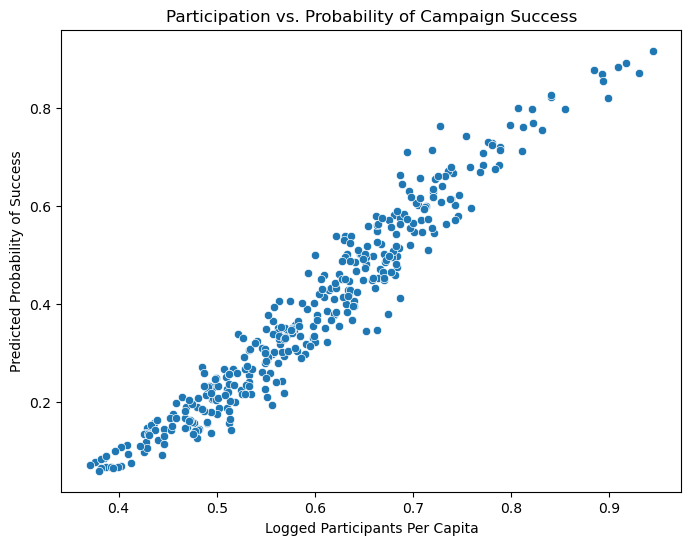

In [9]:
import seaborn as sns
import statsmodels.api as sm

# We include a small value-the epsilon to avoid division by zero
epsilon = 1e-6
navco_data['population'] = navco_data['PARTICIPATION'] / (navco_data['PERCENTAGEPOPULARPARTICIPATION'] + epsilon)
navco_data['Membership Per Capita'] = np.log(navco_data['PARTICIPATION']) / np.log(navco_data['population'])
navco_data['Logged Population'] = np.log(navco_data['population'] + epsilon)

# Handle NaN and inf values
navco_data.replace([np.inf, -np.inf], np.nan, inplace=True)
navco_data.dropna(subset=['Membership Per Capita', 'Logged Population', 'SUCCESS'], inplace=True)

# Logistic regression
X = navco_data[['Membership Per Capita', 'Logged Population']]
X = sm.add_constant(X)
y = navco_data['SUCCESS']
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

# Predict the probability of success
navco_data['Predicted Probability of Success'] = result.predict(X)

# Create a scatter plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=(navco_data['Membership Per Capita']), 
                y='Predicted Probability of Success', data=navco_data)
plt.xlabel('Logged Participants Per Capita')
plt.ylabel('Predicted Probability of Success')
plt.title('Participation vs. Probability of Campaign Success')
plt.show()

### Logistic Regression Analysis Interpretation

#### Model 1 (Including Logged Population)
- **Dependent Variable**: `SUCCESS` (binary outcome of campaign success).
- **Independent Variables**: `Membership Per Capita` and `Logged Population`.
- **No. Observations**: 380 (number of data points used in the model).
- **Pseudo R-squared**: 0.1295.
- **Coefficients**:
  - **Constant (Intercept)**: -2.8209 (p-value: 0.060).
  - **Membership Per Capita**: 7.6677 (p-value: 0.000, indicating a significant positive effect).
  - **Logged Population**: -0.1393 (p-value: 0.059, marginally insignificant).

##### Interpretation of Model 1
- `Membership Per Capita` has a significant positive impact on campaign success.
- `Logged Population` does not significantly impact campaign success.


Optimization terminated successfully.
         Current function value: 0.585675
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.1223
Time:                        17:49:34   Log-Likelihood:                -222.56
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 3.355e-15
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.3547      0.711     -7.536      0.000      -6.747      -3.

C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


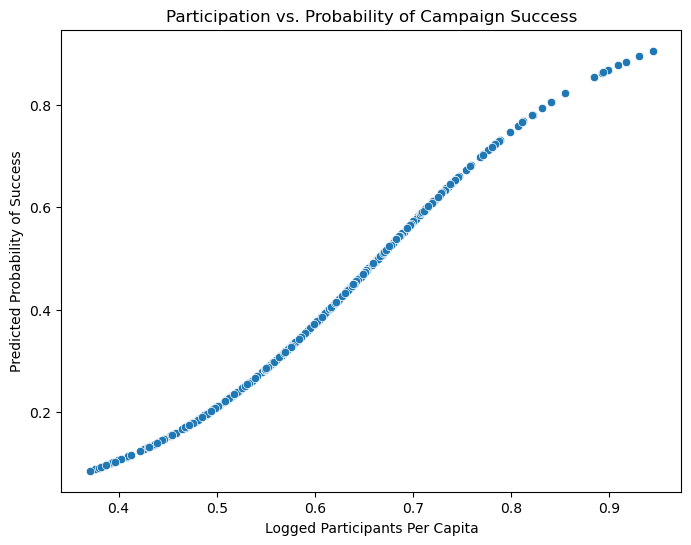

Membership Per Capita for 99% Success Probability: 1.2344018277839417


In [10]:
# Logistic regression
X = navco_data[['Membership Per Capita']]
X = sm.add_constant(X)
y = navco_data['SUCCESS']
model = sm.Logit(y, X)
result2 = model.fit()

print(result2.summary())

# Predict the probability of success
navco_data['Predicted Probability of Success'] = result2.predict(X)

# Create a scatter plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=(navco_data['Membership Per Capita']), 
                y='Predicted Probability of Success', data=navco_data)
plt.xlabel('Logged Participants Per Capita')
plt.ylabel('Predicted Probability of Success')
plt.title('Participation vs. Probability of Campaign Success')
plt.show()

# Some calculationg for the step 4
# Extract coefficients
intercept, coef = result2.params

# Calculate the Membership Per Capita value for 99% success probability
# logit(p) is the inverse of the logistic function
logit_p = np.log(0.99 / (1 - 0.99))
membership_per_capita_99 = (logit_p - intercept) / coef
print(f"Membership Per Capita for 99% Success Probability: {membership_per_capita_99}")

### Logistic Regression Analysis Interpretation

#### Model 2 (Excluding Logged Population)
- **Pseudo R-squared**: 0.1223.
- **Coefficients**:
  - **Constant**: -5.3547 (more significant than in Model 1).
  - **Membership Per Capita**: 8.0604 (remains highly significant).

##### Interpretation of Model 2
- Excluding `Logged Population` shows that `Membership Per Capita` remains a significant predictor of success.
- The increase in the coefficient for `Membership Per Capita` suggests its role becomes more pronounced when not accounting for population size.

##### Summary
We can summarise from the findings that the most important factor on success if the relative participation of each country. Analysis from model 1 shows no big difference on importance as compared with the model 2.

## 4. The Level of Participation Tipping Point

As we mentioned above, a famous output of the research is the 3.5% rule regarding the population participation in a campaign and the probability of success.

Based on your data, create a table like the one below and explain how Chenoweth came up with the rule.

<table>
<thead>
<tr><th>Peak Popular Participation (%)  </th><th style="text-align: right;">  Observations</th><th>Success Rate  </th></tr>
</thead>
<tbody>
<tr><td>greater than 3.5%               </td><td style="text-align: right;">            18</td><td>88.89%        </td></tr>
<tr><td>1.0% - 3.5%                     </td><td style="text-align: right;">            41</td><td>60.98%        </td></tr>
<tr><td>0.25% - 1.0%                    </td><td style="text-align: right;">            92</td><td>45.65%        </td></tr>
<tr><td>0.06% - 0.25%                   </td><td style="text-align: right;">            95</td><td>45.26%        </td></tr>
<tr><td>0.015% - 0.06%                  </td><td style="text-align: right;">            66</td><td>24.24%        </td></tr>
<tr><td>0.0035% - 0.015%                </td><td style="text-align: right;">            44</td><td>9.09%         </td></tr>
<tr><td>less than 0.0035%               </td><td style="text-align: right;">            24</td><td>4.17%         </td></tr>
</tbody>
</table>

Apart from the way Chenoweth came up with the rule, we can derive it in more statistically-based way.  From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign with 99% probability.

In [11]:
# Define the participation percentage groups
bins = [0, 0.0035, 0.015, 0.06, 0.25, 1.0, 3.5, 100]
labels = ['less than 0.0035%', '0.0035% - 0.015%', '0.015% - 0.06%', '0.06% - 0.25%',
          '0.25% - 1.0%', '1.0% - 3.5%', 'greater than 3.5%']

# Categorize the data into these groups
navco_data['Participation Group'] = pd.cut(navco_data['PERCENTAGEPOPULARPARTICIPATION']*100, bins=bins,
                                           labels=labels, right=False)

# Calculate the success rate for each group
grouped_data = navco_data.groupby('Participation Group')['SUCCESS'].agg(['count', 'mean'])
grouped_data['Success Rate'] = np.round(grouped_data['mean'] * 100,2)
grouped_data.rename(columns={'count': 'Observations'}, inplace=True)

# Display the table
print(grouped_data[['Observations', 'Success Rate']].sort_values('Success Rate',ascending=False))

                     Observations  Success Rate
Participation Group                            
greater than 3.5%              18         88.89
1.0% - 3.5%                    41         60.98
0.25% - 1.0%                   92         45.65
0.06% - 0.25%                  95         45.26
0.015% - 0.06%                 66         24.24
0.0035% - 0.015%               44          9.09
less than 0.0035%              24          4.17


C:\Users\tanagnos\AppData\Local\Temp\ipykernel_5272\2753435645.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = navco_data.groupby('Participation Group')['SUCCESS'].agg(['count', 'mean'])


### Discussion on the findings
Chenoweth's research indicated that no government could withstand a challenge of 3.5% of its population without either accommodating the movement or disintegrating. In essence, once participation in a nonviolent campaign reaches a certain threshold — 3.5% of the population — success is inevitable.

The table above, shows the success rates of campaigns at various levels of population participation. It demonstrates that as the participation percentage increases, the success rate of the campaign also tends to increase. The threshold of 3.5% stands out as a significant marker where the likelihood of success jumps considerably, supporting Chenoweth's conclusion.

This analysis is a simplified representation and might not capture all the details of Chenoweth's extensive research. Her rule is likely based on a comprehensive examination of historical cases, considering various factors beyond just the raw percentages.

## Logistic Regression Analysis on Campaign Success

In this analysis, we explore the relationship between campaign participation and the probability of success, using logistic regression. The key steps and findings are as follows:

### Data Preparation and Transformation:
- We introduce a small value, epsilon (`epsilon = 1e-6`), to avoid division by zero in our calculations.
- The `population` is calculated as `navco_data['PARTICIPATION']` divided by `navco_data['PERCENTAGEPOPULARPARTICIPATION'] + epsilon`.
- `Membership_Per_Capita_normal` is then derived as the ratio of `navco_data['PARTICIPATION']` to `navco_data['population']`.
- We handle any infinite or NaN values in the dataset to ensure data quality.

### Logistic Regression Model:
- We perform logistic regression on `Membership_Per_Capita_normal` to predict the `SUCCESS` of a campaign.
- The model includes a constant term for proper statistical inference.
- The logistic regression is fitted using the `sm.Logit` function from the `statsmodels` library.


In [12]:
# Let's do the fit again without the log part...

# We include a small value-the epsilon to avoid division by zero
epsilon = 1e-6
navco_data['population'] = navco_data['PARTICIPATION'] / (navco_data['PERCENTAGEPOPULARPARTICIPATION'] + epsilon)
navco_data['Membership_Per_Capita_normal'] = (navco_data['PARTICIPATION']) / (navco_data['population'])

# Handle NaN and inf values
navco_data.replace([np.inf, -np.inf], np.nan, inplace=True)
navco_data.dropna(subset=['Membership_Per_Capita_normal', 'SUCCESS'], inplace=True)

# Logistic regression
X = navco_data[['Membership_Per_Capita_normal']]
X = sm.add_constant(X)
y = navco_data['SUCCESS']
model = sm.Logit(y, X)
result3 = model.fit()

print(result3.summary())

# Predict the probability of success
navco_data['Predicted Probability of Success'] = result3.predict(X)

Optimization terminated successfully.
         Current function value: 0.614082
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                 0.07977
Time:                        17:49:35   Log-Likelihood:                -233.35
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 2.010e-10
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.8076      0.127     -6.343      0.000

## Finding the participation percentage

To find the value of `Membership_Per_Capita_normal` that corresponds to a 99% probability of success using the logistic regression model `result3`, we need to solve for the value at which the predicted probability is 99%. In logistic regression, the probability of success can be calculated from the logit (log-odds) using the logistic function.

The general logistic function for a binary outcome in logistic regression is:

$ P(\text{success}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \times X)}} $

where:
- $ P(\text{success}) $ is the probability of success.
- $ \beta_0 $ is the intercept of the model.
- $ \beta_1 $ is the coefficient for the predictor variable.
- $ X $ is the value of the predictor variable (`Membership_Per_Capita_normal` in this case).

To find the value of `Membership_Per_Capita_normal` for a 99% success probability, we set $ P(\text{success}) = 0.99 $ and solve for $ X $:

$ 0.99 = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \times X)}} $

Let's solve this equation to find the required `Membership_Per_Capita_normal` value:

1. Rearrange the equation to solve for $ X $:
   
   $ \log\left(\frac{0.99}{1 - 0.99}\right) = \beta_0 + \beta_1 \times X $

2. Solve for $ X $:

   $ X = \frac{\log\left(\frac{0.99}{1 - 0.99}\right) - \beta_0}{\beta_1} $


0.09655945326772693
Percentage population participation at 99% Success Probability: 9.66%


C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tanagnos\anaconda3\envs\PDS\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


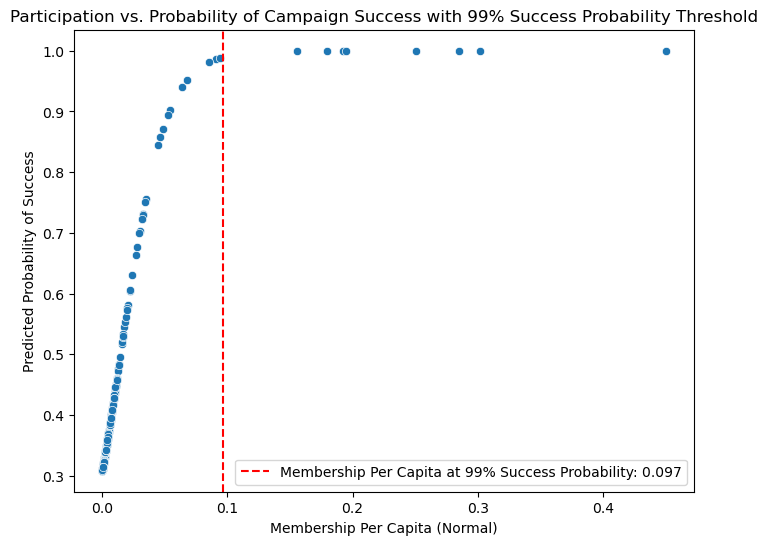

In [13]:
# Extract the coefficients from the model
intercept, beta_membership_per_capita_normal = result3.params

# Calculate the log-odds for a 99% success probability
logit_99 = np.log(0.99 / (1 - 0.99))

# Solve for the 'Membership_Per_Capita_normal' value that gives this probability
membership_per_capita_normal_99 = (logit_99 - intercept) / beta_membership_per_capita_normal

epsilon = 1e-6
# Calculate PERCENTAGEPOPULARPARTICIPATION
percentage_popular_participation = membership_per_capita_normal_99 - epsilon

# Convert to percentage
percentage_popular_participation_percent = percentage_popular_participation * 100

print(f'Percentage population participation at 99% Success Probability: {percentage_popular_participation_percent:.2f}%')

# Create a scatter plot with Seaborn showing the predicted probabilities
plt.figure(figsize=(8, 6))
sns.scatterplot(x=navco_data['Membership_Per_Capita_normal'], y=navco_data['Predicted Probability of Success'], data=navco_data)
plt.axvline(x=membership_per_capita_normal_99, color='red', linestyle='--', label=f'Membership Per Capita at 99% Success Probability: {membership_per_capita_normal_99:.3f}')
plt.xlabel('Membership Per Capita (Normal)')
plt.ylabel('Predicted Probability of Success')
plt.title('Participation vs. Probability of Campaign Success with 99% Success Probability Threshold')
plt.legend()
plt.show()

## 5. Nonviolent Resistance and Target Regime Type

Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic   regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.


In [14]:
# Merge Datasets
merged_data = pd.merge(navco_data, polity_data, how='left', left_on='LOCATION', right_on='country')

# Data Transformation
merged_data['log_participation'] = np.log(merged_data['PARTICIPATION'] + 1)  # Adding 1 to avoid log(0)
merged_data['log_population'] = np.log(merged_data['population'] + 1)

# Handling missing values again sanity chk
merged_data.dropna(subset=['SUCCESS', 'NONVIOL', 'polity2', 'log_participation', 'log_population'], inplace=True)

# Logistic Regression
X = merged_data[['NONVIOL', 'polity2', 'log_participation', 'log_population']]
X = sm.add_constant(X)  # Add a constant term
y = merged_data['SUCCESS']

model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.553598
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                SUCCESS   No. Observations:                32796
Model:                          Logit   Df Residuals:                    32791
Method:                           MLE   Df Model:                            4
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.1857
Time:                        17:49:35   Log-Likelihood:                -18156.
converged:                       True   LL-Null:                       -22297.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.4434      0.141     24.416      0.000       3.167       3.720
NONVIOL 

## Discussion on the results

The results of the logistic regression provide valuable insights into the relationship between nonviolent resistance, regime type, and the probability of a campaign's success. Let's break down the key findings:

### Nonviolent Resistance (`NONVIOL`):
- The coefficient for `NONVIOL` is positive (`0.7090`) and statistically significant (`p < 0.0001`).
- This indicates that nonviolent resistance is a significant predictor of campaign success, even after controlling for regime type, participation, and population.
- The positive coefficient suggests that nonviolent campaigns are more likely to be successful compared to violent ones.

### Regime Type (`polity2`):
- The `polity2` coefficient is also positive (`0.0056`) and statistically significant (`p = 0.008`).
- This suggests that the type of regime (measured by the Polity IV project's 'polity2' score) also influences the likelihood of a campaign's success.
- The positive sign implies that campaigns targeting more democratic regimes (higher 'polity2' scores) are slightly more likely to succeed.

### Log of Participation (`log_participation`):
- This variable has a positive coefficient (`0.4746`), indicating a positive relationship between the level of participation in a campaign (on a logarithmic scale) and its success.
- The significant p-value (`p < 0.0001`) confirms the importance of participation in determining the outcome of a campaign.

### Logged Population of Location (`log_population`):
- The coefficient is negative (`-0.5332`) and significant (`p < 0.0001`).
- This suggests that campaigns in locations with larger populations (when logged) are less likely to succeed. This could be due to the complexity and challenges of organizing effective campaigns in more populous settings.

### Model Performance:
- The Pseudo R-squared value (`0.1857`) indicates a modest fit of the model. This suggests that while the model captures some of the variability in campaign success, there are other factors not included in the model that also influence outcomes.
- The model converged successfully, indicating reliable results.

#### Implications:
- The significant and positive coefficient for nonviolent resistance reinforces the idea that nonviolent strategies tend to be more effective than violent ones in achieving campaign success.
- The influence of regime type, as indicated by the 'polity2' score, suggests that the nature of the regime being targeted can affect a campaign's likelihood of success.
- High participation levels are crucial for campaign success, but the negative effect of population size highlights potential challenges in larger societies.

#### Limitations and Considerations:
- Logistic regression provides probabilities of success, not certainties. The results should be interpreted in terms of increased or decreased likelihoods.
- The model's modest R-squared value indicates that other unmeasured factors also play significant roles in determining campaign outcomes.
- The data and model assumptions should be scrutinized, and results should be considered in the context of broader socio-political dynamics.

## Honor Code

You understand that this is an individual assignment, and as such you must carry it out alone. You may seek help on the Internet, on ChatGPT, Bard, or Bing, by Googling or searching in StackOverflow for general questions pertaining to the use of Python and pandas libraries and idioms. However, it is not right to ask direct questions that relate to the assignment and where people will actually solve your problem by answering them. You may discuss with your fellow students in order to better understand the questions, if they are not clear enough, but you should not ask them to share their answers with you, or to help you by giving specific advice.